In [15]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import jensenshannon
import scipy.stats as stats
from pathlib import Path
import sys
import matplotlib.pyplot as plt


In [18]:
BASE_PATH = Path.cwd().parent
TESTING_FILES_BASE_PATH = BASE_PATH/"testing"/"files"
sys.path.append(str(BASE_PATH))

In [19]:
from model.main import EMOTIONS

def plot_beliefs(Prob_User, Prob_Character, Prob_Character_label):
    x = np.arange(len(EMOTIONS))
    width = 0.35

    fig, ax = plt.subplots()
    bars1 = ax.bar(x - width/2, Prob_User, width, label="User's state")
    bars2 = ax.bar(x + width/2, Prob_Character, width, label=Prob_Character_label)

    ax.set_xlabel('Mental States')
    ax.set_ylabel('Probability')
    ax.set_title('Belief Distribution')
    ax.set_xticks(x)
    ax.set_xticklabels(EMOTIONS)
    ax.legend()

    plt.ylim(0, 1)
    plt.xticks(rotation=90)
    plt.show()

In [20]:
def entropy(dist):
    dist = np.array(dist)
    dist = dist[dist > 0]  # Avoid log(0)
    return -np.sum(dist * np.log2(dist))


In [21]:
def analyse_files(folder_path, num_files):
    Prob_Users = []
    Prob_Characters = []
    L1s = []
    jsds = []
    pearson_corrs = []
    spearman_corrs = []
    entropy_users = []
    entropy_characters = []
    entropy_deltas = []

    for i in range(num_files):
        df = pd.read_csv(folder_path/("message_"+str(i+1)+"_belief_dist.csv"))
        Prob_Users.append(df["Prob_User"])
        Prob_Characters.append(df["Prob_Character"])

        L1 = sum(abs(prob_user - prob_character) for prob_user, prob_character in zip(df["Prob_User"], df["Prob_Character"])) # L1 norm distance (manhattan)
        L1s.append(L1)

        jsd = jensenshannon(df["Prob_User"], df["Prob_Character"], base=2) # Jensen-Shannon Divergence
        jsds.append(jsd)
        
        pearson_corr, _ = stats.pearsonr(df["Prob_User"], df["Prob_Character"]) # Pearson correlation (linear)
        pearson_corrs.append(pearson_corr)
        
        spearman_corr, _ = stats.spearmanr(df["Prob_User"], df["Prob_Character"]) # Spearman correlation (rank)
        spearman_corrs.append(spearman_corr)

        entropy_user = entropy(df["Prob_User"])
        entropy_users.append(entropy_user)

        entropy_character = entropy(df["Prob_Character"])
        entropy_characters.append(entropy_character)

        entropy_delta = abs(entropy_user-entropy_character)
        entropy_deltas.append(entropy_delta)

    return Prob_Users, Prob_Characters, L1s, jsds, pearson_corrs, spearman_corrs, entropy_users, entropy_characters, entropy_deltas

Get statistics for mental states: User sate against other entity's state according to system (emotions explicit)
Display stats for each message


------------------------------------------------------------------
 User message: Hi, I’m feeling really frustrated. A colleague presented work that I spent a lot of time on, and they didn’t acknowledge my role in it at all. I’m upset, but I also don’t want to come across as petty. What’s the best way to bring this up?


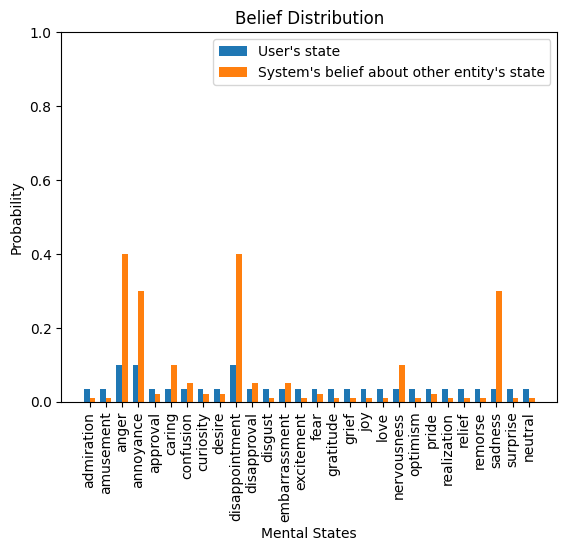

L1 distance: 1.6742857142857153
Jensen-Shannon Divergence: 0.44372742457286596
Pearson Correlation: 0.8682229503108695
Spearman Correlation: 0.5676733633868591
Entropy of User's belief distribution: 5.28885960887478
Entropy of Other entity's belief distribution: 4.906922151166125
Entropy delta: 0.3819374577086556

------------------------------------------------------------------
 User message: I’m honestly feeling pretty overwhelmed. My manager constantly checks in on every detail of what I’m doing, and it’s starting to make me doubt myself. I don’t want to be disrespectful, but I need more breathing room.


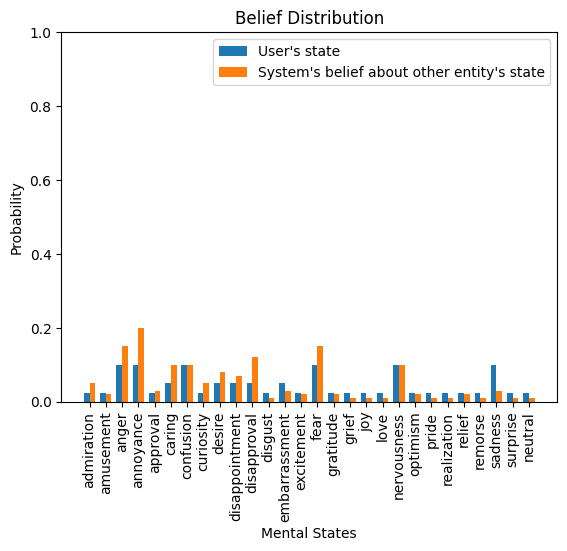

L1 distance: 0.6750000000000003
Jensen-Shannon Divergence: 0.2438029236642906
Pearson Correlation: 0.8001596766612833
Spearman Correlation: 0.8207482289657452
Entropy of User's belief distribution: 5.335458320981389
Entropy of Other entity's belief distribution: 5.259010469862904
Entropy delta: 0.07644785111848496

------------------------------------------------------------------
 User message: I’m starting to feel worn down. A teammate keeps making these passive-aggressive comments when we’re working together, and while they act like it’s nothing, it’s getting under my skin. How do I call this out without making things worse?


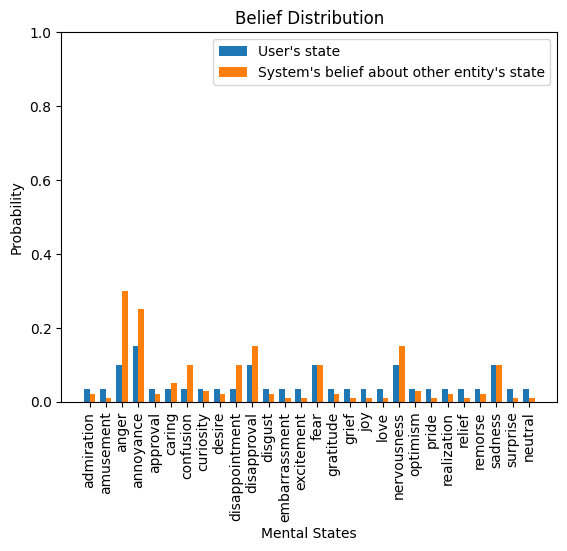

L1 distance: 0.9214285714285709
Jensen-Shannon Divergence: 0.3055218937911923
Pearson Correlation: 0.8549343184536865
Spearman Correlation: 0.7141883509470037
Entropy of User's belief distribution: 5.848716325328155
Entropy of Other entity's belief distribution: 5.145106106088186
Entropy delta: 0.7036102192399687

------------------------------------------------------------------
 User message: I’m annoyed and a bit resentful. I’m working on a joint project, and I’ve done almost everything while my colleague barely shows up. I don’t want to create tension, but I can’t keep picking up the slack.


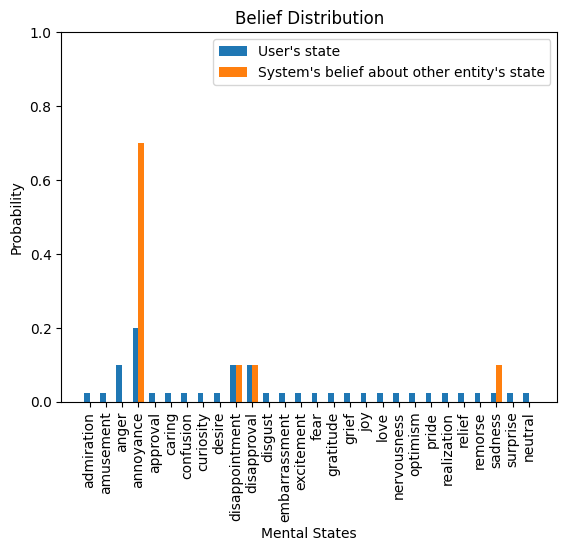

L1 distance: 1.2499999999999996
Jensen-Shannon Divergence: 0.665807412617414
Pearson Correlation: 0.8661564014260574
Spearman Correlation: 0.73
Entropy of User's belief distribution: 4.6541209043761
Entropy of Other entity's belief distribution: 1.3567796494470397
Entropy delta: 3.2973412549290604

------------------------------------------------------------------
 User message: I’m feeling disrespected. A coworker frequently talks over me or dismisses what I say in meetings, and it’s chipping away at my confidence. How do I assert myself without causing conflict?


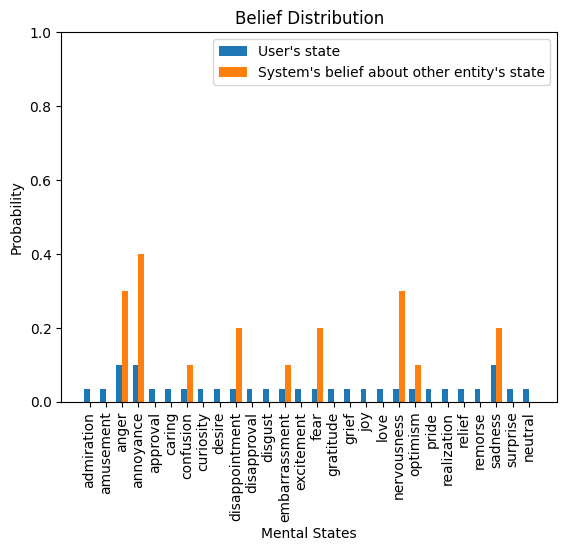

L1 distance: 2.0642857142857136
Jensen-Shannon Divergence: 0.6223643242196792
Pearson Correlation: 0.7081551239136963
Spearman Correlation: 0.6042651685137155
Entropy of User's belief distribution: 5.28885960887478
Entropy of Other entity's belief distribution: 3.9606858798532945
Entropy delta: 1.328173729021486

------------------------------------------------------------------
 User message: I feel really uncomfortable. A coworker makes jokes that cross the line, but they always laugh it off like it’s nothing. I’m not sure how to say something without it becoming a big deal, but I can’t keep pretending it’s okay.


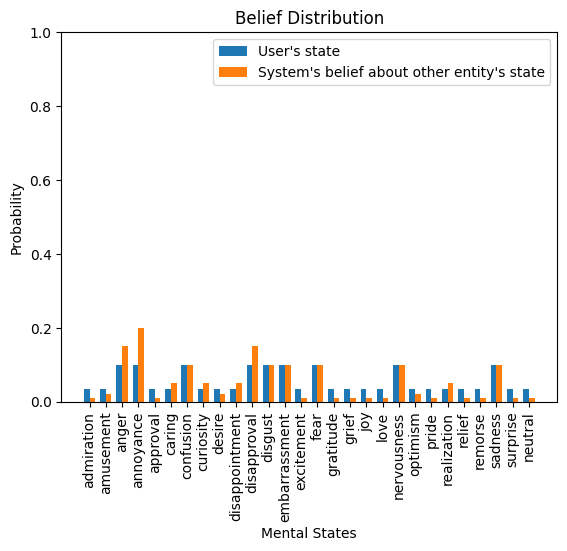

L1 distance: 0.6128571428571425
Jensen-Shannon Divergence: 0.24722244419918107
Pearson Correlation: 0.8978010659828574
Spearman Correlation: 0.849422737711778
Entropy of User's belief distribution: 6.251868982509141
Entropy of Other entity's belief distribution: 5.278911887296676
Entropy delta: 0.9729570952124647

------------------------------------------------------------------
 User message: I’m getting really frustrated. I’m supposed to be collaborating with someone who barely responds to messages or updates me on progress, and it’s slowing everything down. How do I bring this up directly but professionally?


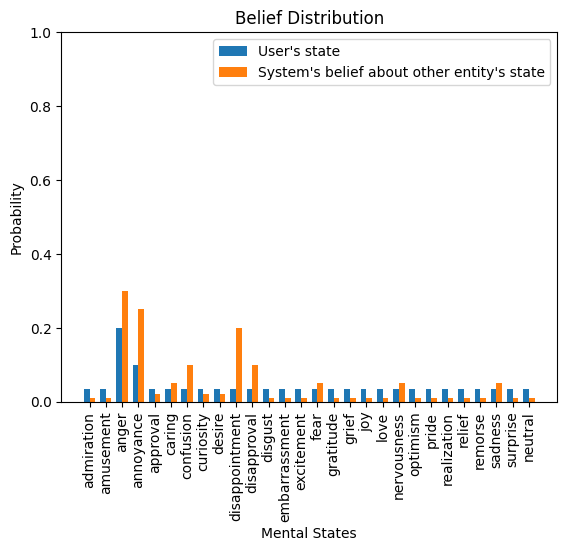

L1 distance: 1.0585714285714285
Jensen-Shannon Divergence: 0.3862304231204607
Pearson Correlation: 0.7961202305646204
Spearman Correlation: 0.49635372052976945
Entropy of User's belief distribution: 5.260550856091124
Entropy of Other entity's belief distribution: 4.41589489693272
Entropy delta: 0.8446559591584037

------------------------------------------------------------------
 User message: I’m feeling hurt and confused. I recently got promoted, and someone I was close with at work has been acting cold and distant since then. I don’t want to lose that connection, but I don’t know how to fix this.


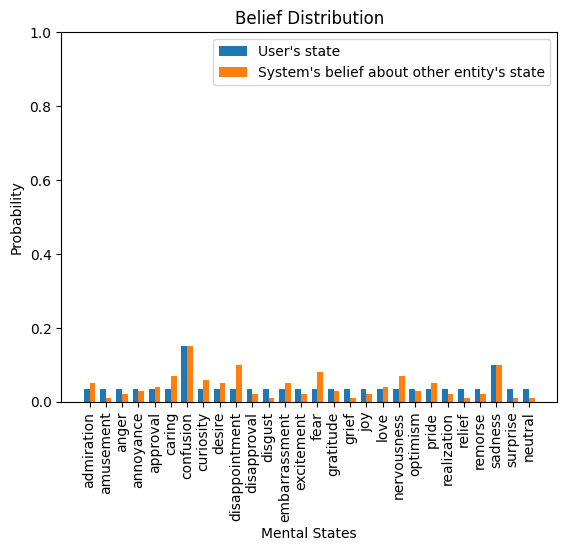

L1 distance: 0.5328571428571427
Jensen-Shannon Divergence: 0.2525433660938813
Pearson Correlation: 0.7138398695030967
Spearman Correlation: 0.44370499649390127
Entropy of User's belief distribution: 5.206710076238583
Entropy of Other entity's belief distribution: 4.914171412441716
Entropy delta: 0.29253866379686677

------------------------------------------------------------------
 User message: I’m feeling drained. There’s someone on my team who constantly positions themselves for recognition—even when the work was shared. I’m tired of being sidelined but don’t want to come off as bitter.


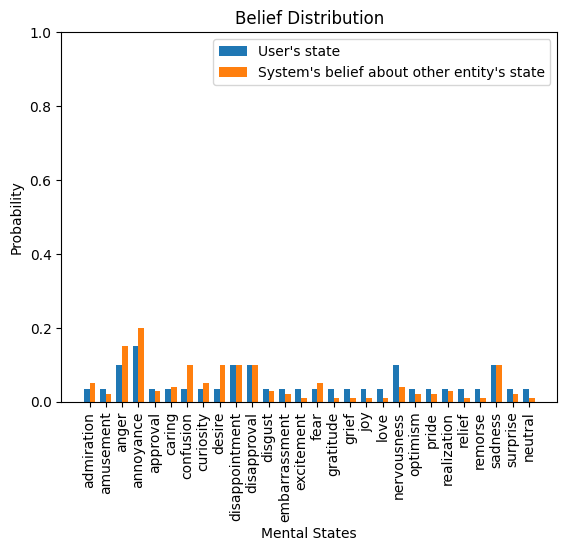

L1 distance: 0.6371428571428568
Jensen-Shannon Divergence: 0.25911355477541764
Pearson Correlation: 0.8055473493025058
Spearman Correlation: 0.6377929272001149
Entropy of User's belief distribution: 5.848716325328155
Entropy of Other entity's belief distribution: 5.106886761135439
Entropy delta: 0.7418295641927157

------------------------------------------------------------------
 User message: I’m frustrated and honestly a little anxious. My project partner has a chaotic, last-minute approach that clashes completely with my structured style. It’s causing a lot of stress. How can I address this without creating more tension?


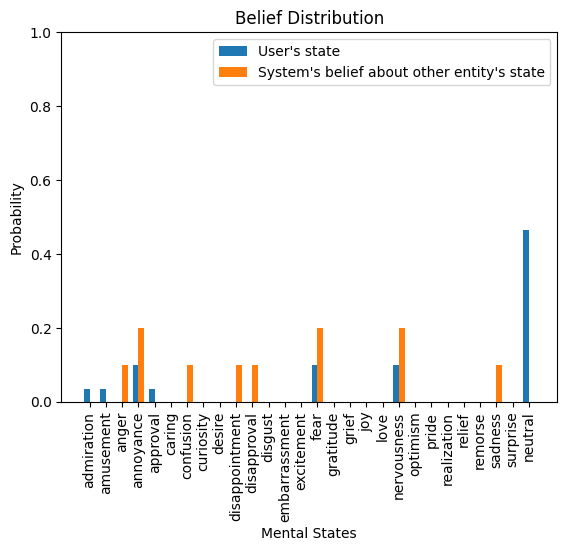

L1 distance: 1.3714285714285714
Jensen-Shannon Divergence: 0.7561041501209272
Pearson Correlation: 0.15348392004832384
Spearman Correlation: 0.3185113527204339
Entropy of User's belief distribution: 2.0255770862193323
Entropy of Other entity's belief distribution: 3.0541209043760986
Entropy delta: 1.0285438181567663


In [ ]:
folder_path = TESTING_FILES_BASE_PATH/"case_1"/"explicit_emotions"

with open(BASE_PATH/r"testing/files/user_inputs/inputs_explicit_emotions.txt", encoding="utf-8") as f_explicit:
    messages_emotions_explicit = f_explicit.read().split("\n")

num_files = len(messages_emotions_explicit) # 10
Prob_Character_label = "System's belief about other entity's state"
Prob_Users, Prob_Characters, L1s, jsds, pearson_corrs, spearman_corrs, entropy_users, entropy_characters, entropy_deltas = analyse_files(folder_path, num_files)

for i in range(num_files):
    print("\n------------------------------------------------------------------" \
    "\n User message:", messages_emotions_explicit[i])
    plot_beliefs(Prob_Users[i], Prob_Characters[i], Prob_Character_label)
    print("L1 distance:", L1s[i])
    print("Jensen-Shannon Divergence:", jsds[i])
    print("Pearson Correlation:", pearson_corrs[i])
    print("Spearman Correlation:", spearman_corrs[i])
    print("Entropy of User's belief distribution:", entropy_users[i])
    print("Entropy of Other entity's belief distribution:", entropy_characters[i])
    print("Entropy delta:", entropy_deltas[i])

explicit_emotion_results = [Prob_Users, Prob_Characters, L1s, jsds, pearson_corrs, spearman_corrs, entropy_users, entropy_characters, entropy_deltas]


In [ ]:
folder_path = TESTING_FILES_BASE_PATH/"case_1"/"implicit_emotions"

with open(BASE_PATH/r"testing/files/user_inputs/inputs_implicit_emotions.txt", encoding="utf-8") as f_implicit:
    messages_emotions_implicit = f_implicit.read().split("\n")

num_files = len(messages_emotions_implicit) # 10
Prob_Character_label = "System's belief about other entity's state"
Prob_Users, Prob_Characters, L1s, jsds, pearson_corrs, spearman_corrs, entropy_users, entropy_characters, entropy_deltas = analyse_files(folder_path, num_files)

for i in range(num_files):
    print("\n------------------------------------------------------------------" \
    "\n User message:", messages_emotions_explicit[i])
    plot_beliefs(Prob_Users[i], Prob_Characters[i], Prob_Character_label)
    print("L1 distance:", L1s[i])
    print("Jensen-Shannon Divergence:", jsds[i])
    print("Pearson Correlation:", pearson_corrs[i])
    print("Spearman Correlation:", spearman_corrs[i])
    print("Entropy of User's belief distribution:", entropy_users[i])
    print("Entropy of Other entity's belief distribution:", entropy_characters[i])
    print("Entropy delta:", entropy_deltas[i])

implicit_emotion_results = [Prob_Users, Prob_Characters, L1s, jsds, pearson_corrs, spearman_corrs, entropy_users, entropy_characters, entropy_deltas]


High level overview

In [ ]:
for i in range 